In [1]:
using Distributions
using StatsPlots
default(fmt=:png)

prob_p_is_between_L_and_U(L, U, n, p) = 
    sum((L(n,k) ≤ p ≤ U(n,k)) * pdf(Binomial(n, p), k) for k in 0:n)

function plot_prob_p_is_between_L_and_U(L, U, n)
    f(p) = prob_p_is_between_L_and_U(L, U, n, p)
    ps = range(0, 1, 1001)
    plot(ps, f; label="", title="n=$n")
end

function plot2x2_prob_p_is_between_L_and_U(L, U;
        ns=(2^4, 2^6, 2^8, 2^10), kwargs...)
    PP = []
    for n in ns
        P = plot_prob_p_is_between_L_and_U(L, U, n)
        push!(PP, P)
    end
    plot(PP...; size=(1000, 600), layout=(2,2), kwargs...)
end

plot2x2_prob_p_is_between_L_and_U (generic function with 1 method)

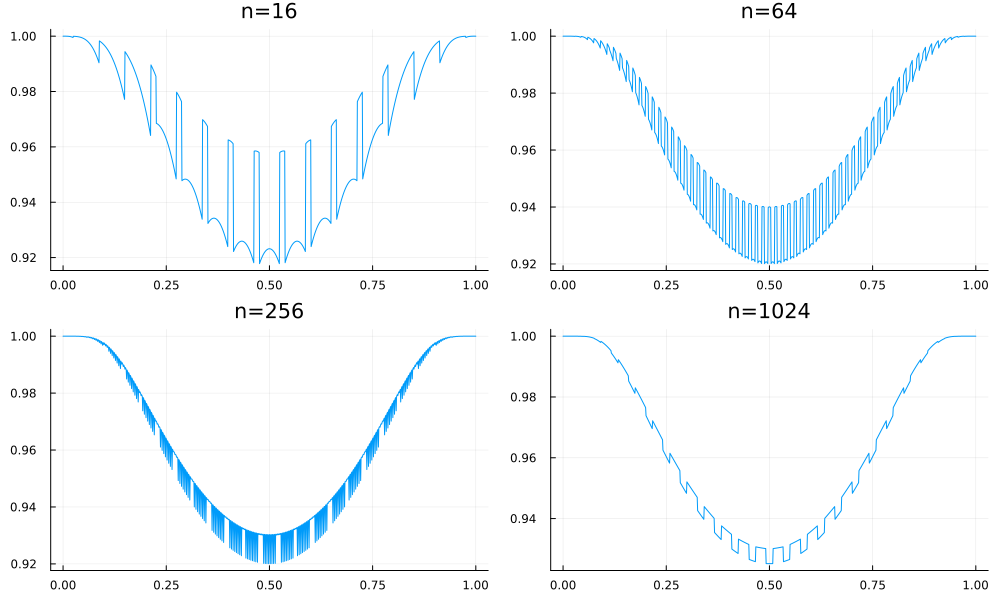

In [2]:
L(n, k) = (p̂ = k/n; p̂ - 0.9/√n)
U(n, k) = (p̂ = k/n; p̂ + 0.9/√n)
plot2x2_prob_p_is_between_L_and_U(L, U)

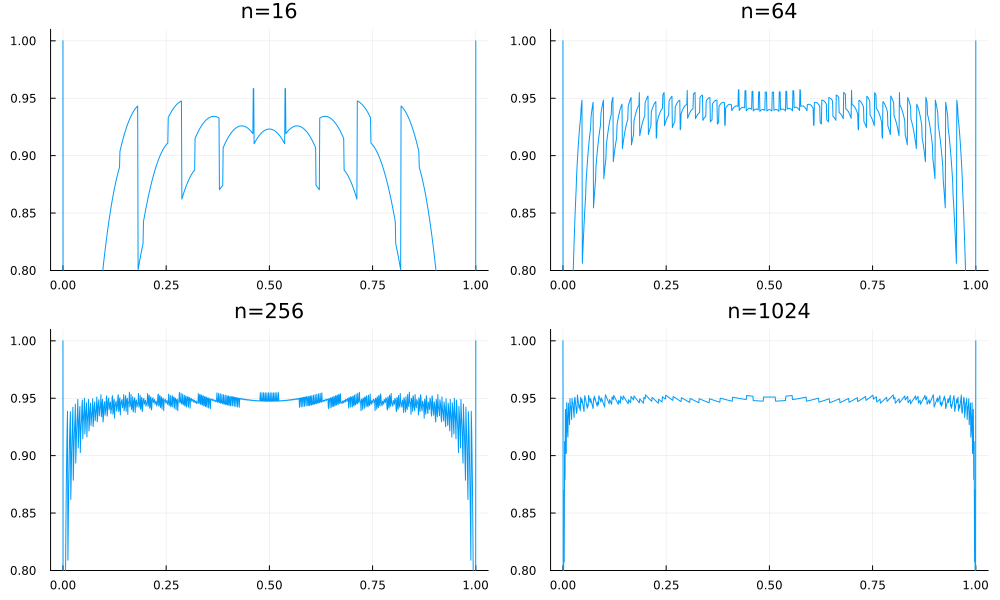

In [3]:
# 95% confidence interval of Wald
L(n, k) = (p̂ = k/n; p̂ - 1.96√(p̂*(1-p̂)/n))
U(n, k) = (p̂ = k/n; p̂ + 1.96√(p̂*(1-p̂)/n))
plot2x2_prob_p_is_between_L_and_U(L, U; ylim=(0.8, 1.01))

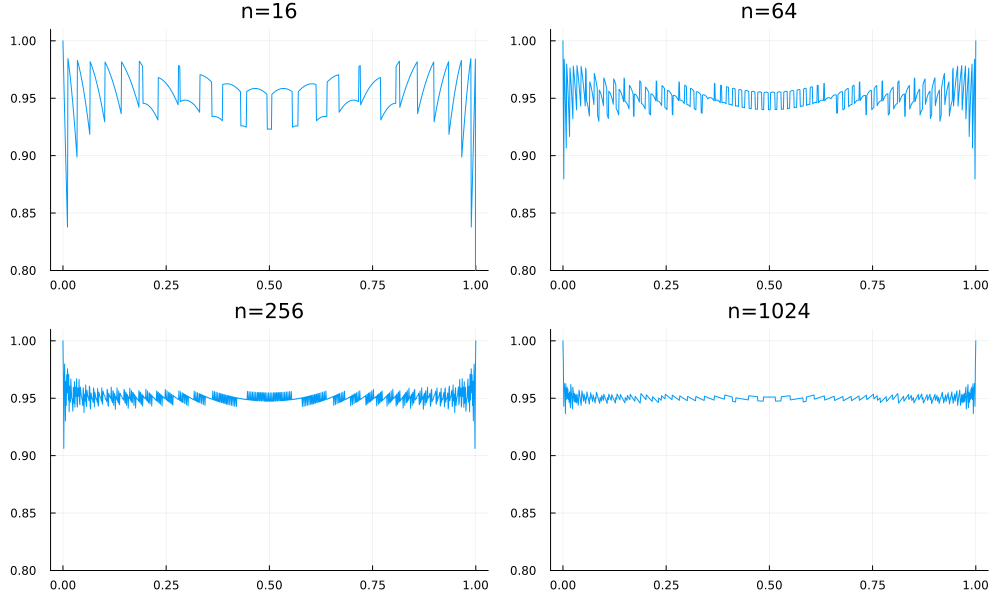

In [4]:
function ci_wilson(n, k; α=0.05)
    c = cquantile(Normal(), α/2) # 1.96 if α=0.05
    p̂ = k/n
    L = 1/(1+c^2/n) * (p̂ + c^2/(2n) - c*√(p̂*(1-p̂)/n + c^2/(4n^2)))
    U = 1/(1+c^2/n) * (p̂ + c^2/(2n) + c*√(p̂*(1-p̂)/n + c^2/(4n^2)))
    L, U
end

# 95% confidence interval of Wilson
L(n, k) = ci_wilson(n, k)[1]
U(n, k) = ci_wilson(n, k)[2]
plot2x2_prob_p_is_between_L_and_U(L, U; ylim=(0.8, 1.01))

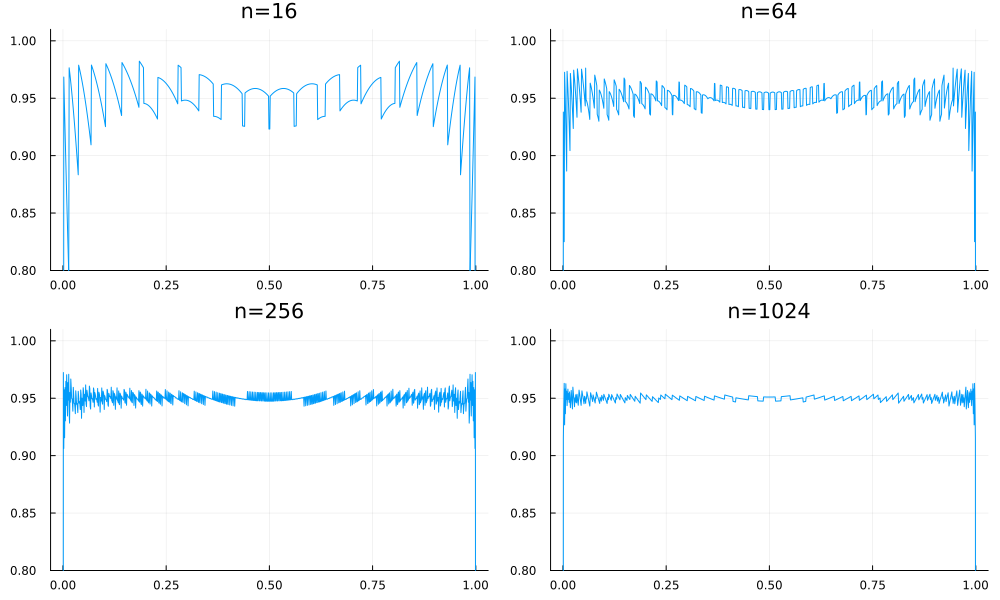

In [5]:
ci_bayes_eti(n, k; α=0.05, a=1, b=1) =
    quantile.(Beta(k+a, n-k+b), (α/2, 1-α/2))

# 95% credible interval (ETI)
L(n, k) = ci_bayes_eti(n, k)[1]
U(n, k) = ci_bayes_eti(n, k)[2]
plot2x2_prob_p_is_between_L_and_U(L, U; ylim=(0.8, 1.01))

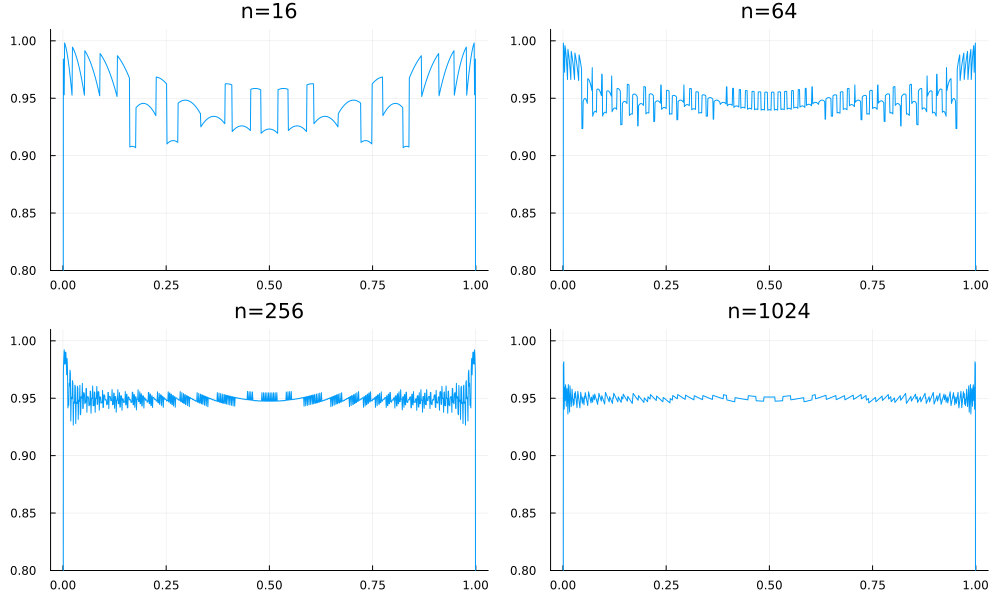

In [6]:
using Optim

function ci_bayes_hdi(n, k; α=0.05, a=1, b=1)
    posterior = Beta(k+a, n-k+b)
    f(p) = quantile(posterior, cdf(posterior, p)+1-α) - p
    o = optimize(f, 0, quantile(posterior, α))
    p_L = o.minimizer
    [p_L, p_L+f(p_L)]
end

# 95% credible interval (HDI)
L(n, k) = ci_bayes_hdi(n, k)[1]
U(n, k) = ci_bayes_hdi(n, k)[2]
plot2x2_prob_p_is_between_L_and_U(L, U; ylim=(0.8, 1.01))

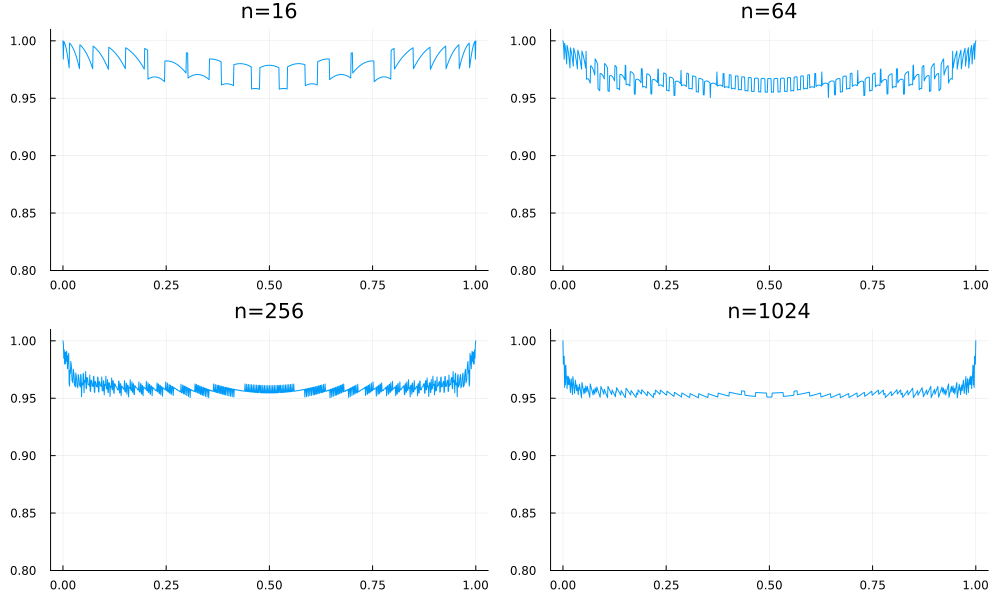

In [7]:
function ci_clopper_pearson(n, k; α=0.05)
    L = k > 0 ? quantile(Beta(k, n-k+1), α/2) : zero(α)
    U = k < n ? quantile(Beta(k+1, n-k), 1-α/2) : one(α)
    L, U
end

# 95% confidence interval of Clopper-Pearson
L(n, k) = ci_clopper_pearson(n, k)[1]
U(n, k) = ci_clopper_pearson(n, k)[2]
plot2x2_prob_p_is_between_L_and_U(L, U; ylim=(0.8, 1.01))